# A Report on Feature Importance
#### Submitted by - Deepak Singh

## Contents

- [Introduction](#1)
- [Spearman's rank correlation coefficient](#2)
    - Explanation
    - Implementation
    - Feature Selection based on Spearman's Rank Correlation Coeff
- [Pearson Correlation Coefficient](#3)
    - Explanation
    - Implementation
    - Feature Selection based on Pearson Coefficient
- [Principle Component Analysis (PCA)](#4)
    - Explanation
    - Finding the Eigen Vectors and Principal Component Scores
    - Feature Selection basis PCA
- [Mutual Information Score](#5)
    - Explanation and Implementation
    - Finding the best features based on Mutual Information Score
- [Feature Importance in Classification problem](#6a)
    - Ensemble Feature Importance
    - Based on feature permutation
    - Testing on Stars Dataset
- [Feature Selection using SHAP](#7)
    - Application to Regression
    - SHAP Application to Classification
    - Advantages and Disadvantages of SHAP
- [Feature Selection](#8)
- [Summary](#9)
- [References](#10)
    - Initialization code
    - References used from the internet
    - Packages used in implementation
<a id='1'></a>

### Introduction

- Machine learning explainability is a topic that is seeing a growth in importance
- In business applications, organizations may choose to use a simple linear model as opposed to a complex non-linear model for the sake of interpretability
- When we build a model, we’ll need the ability to explain in plain simple words how it's making predictions
- This helps in multiple ways - for one we can figure out when and if the model will work well, and two, the stakeholders (clients and investors) are well aligned as to what they are investing into
- Often, you might have to explain your model to your clients and investors, especially when you’re managing their money using that model. It doesn’t 

There are many different ways of interpret Feature importance for both Regressiona nd Classification type of problems. In this report, I will be discussion about the following key techniques snad their implementations using python:
- Spearman's Rank Coefficient
- Pearson Correlation Coefficient
- PCA
- Mutual Information Score
- Ensemble Feature Importance
- Feature Permutation
- SHAP
- Feature Selection

***
<a id='2'></a>

### Spearman's rank correlation coefficient

- It is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function.

For a sample of size n, the n raw scores 
$X_{i},Y_{i}$ are converted to ranks 
${\displaystyle \operatorname {R} ({X_{i}}),\operatorname {R} ({Y_{i}})}$, and <br>
$r_{s}$ is computed as:

${\displaystyle r_{s}=\rho _{\operatorname {R} (X),\operatorname {R} (Y)}={\frac {\operatorname {cov} (\operatorname {R} (X),\operatorname {R} (Y))}{\sigma _{\operatorname {R} (X)}\sigma _{\operatorname {R} (Y)}}},}$
where

- $\rho$  denotes the usual Pearson correlation coefficient, but applied to the rank variables,
- ${\displaystyle \operatorname {cov} (\operatorname {R} (X),\operatorname {R} (Y))}$ is the covariance of the rank variables <br>
⁡- ${\displaystyle \sigma _{\operatorname {R} (X)}}$ and ${\displaystyle \sigma _{\operatorname {R} (Y)}}$ are the standard deviations of the rank variables

Ref: https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient

### Implementation

##### Sample dataset (contains 515,000 customer reviews and scoring of 1493 luxury hotels across Europe) sourced from Kaggle
Ref: https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe

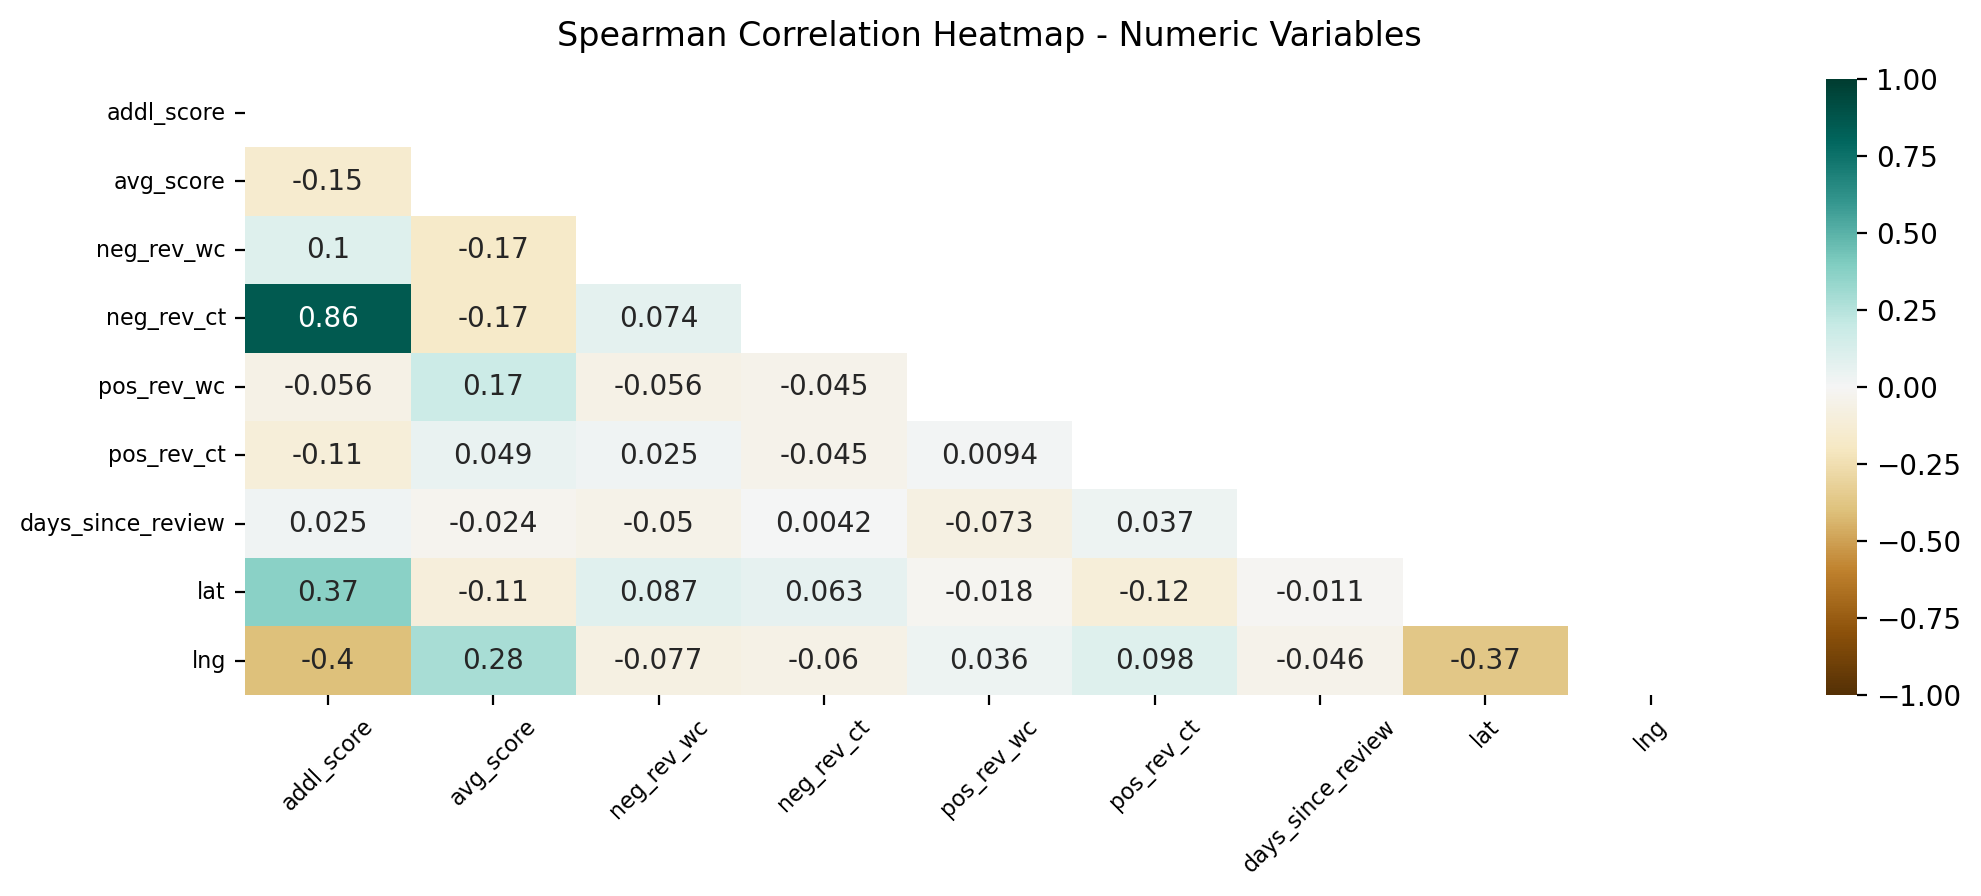

In [3]:
df = hotel_preprocess()
num_cols = ['addl_score', 'avg_score', 'neg_rev_wc', 'neg_rev_ct', 'pos_rev_wc', 'pos_rev_ct', 'days_since_review', 'lat', 'lng']
plot_coeff(df, num_cols)

### Features based on Spearman's Rank Score

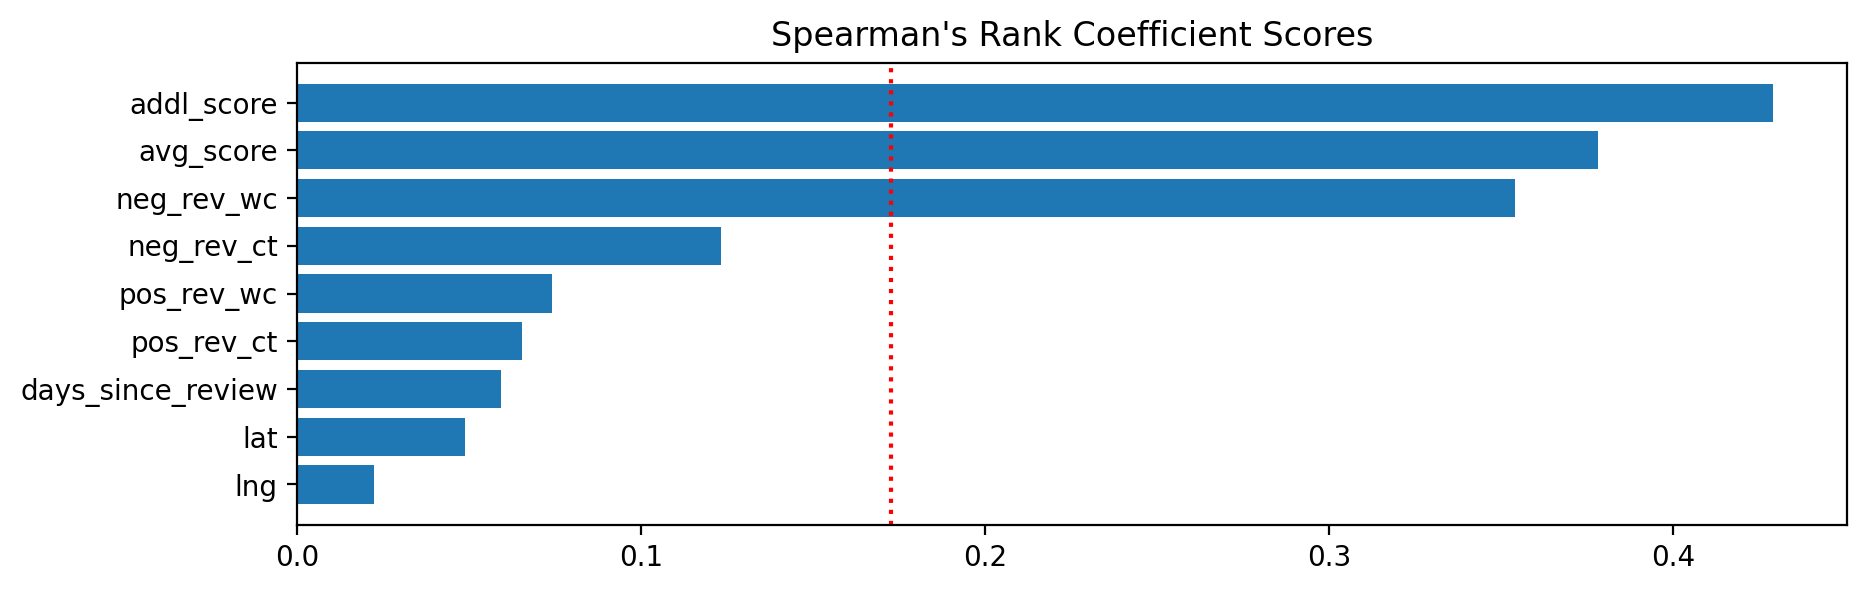

In [4]:
plot_spear(df, num_cols)

As clear from above plot, some of the features such as Positive Review word count, total positive reviews count, Negative Review word count, total Negative reviews count, days_since_review are not that important as per Spearman's Rank Coefficient

***
<a id='3'></a>

### Pearson Correlation Coefficient

Pearson's correlation coefficient, when applied to a population, is commonly represented by the Greek letter ρ (rho) and may be referred to as the population correlation coefficient or the population Pearson correlation coefficient. Given a pair of random variables 

(X,Y), the formula for ρ is:

cov= ${\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}$ <br>
where
- $\operatorname {cov}$  is the covariance
- $\sigma _{X}$ is the standard deviation of X
- $\sigma_Y$  is the standard deviation of Y.

The formula for $\rho$  can be expressed in terms of mean and expectation.
Since[10]
cov = ${\displaystyle \operatorname {cov} (X,Y)=\operatorname {\mathbb {E} } [(X-\mu _{X})(Y-\mu _{Y})],}$
the formula for 
$\rho$  can also be written as

${\displaystyle \rho _{X,Y}={\frac {\operatorname {\mathbb {E} } [(X-\mu _{X})(Y-\mu _{Y})]}{\sigma _{X}\sigma _{Y}}}}$ <br>
where
- $\sigma_Y$  and 
- $\sigma _{X}$ are defined as above
- $\mu _{X}$ is the mean of X
- $\mu _{Y}$ is the mean of Y
- ${\displaystyle \operatorname {\mathbb {E} } }$ is the expectation

Ref: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

### Implementation

### Pearson Correlation heatmap for numeric Features

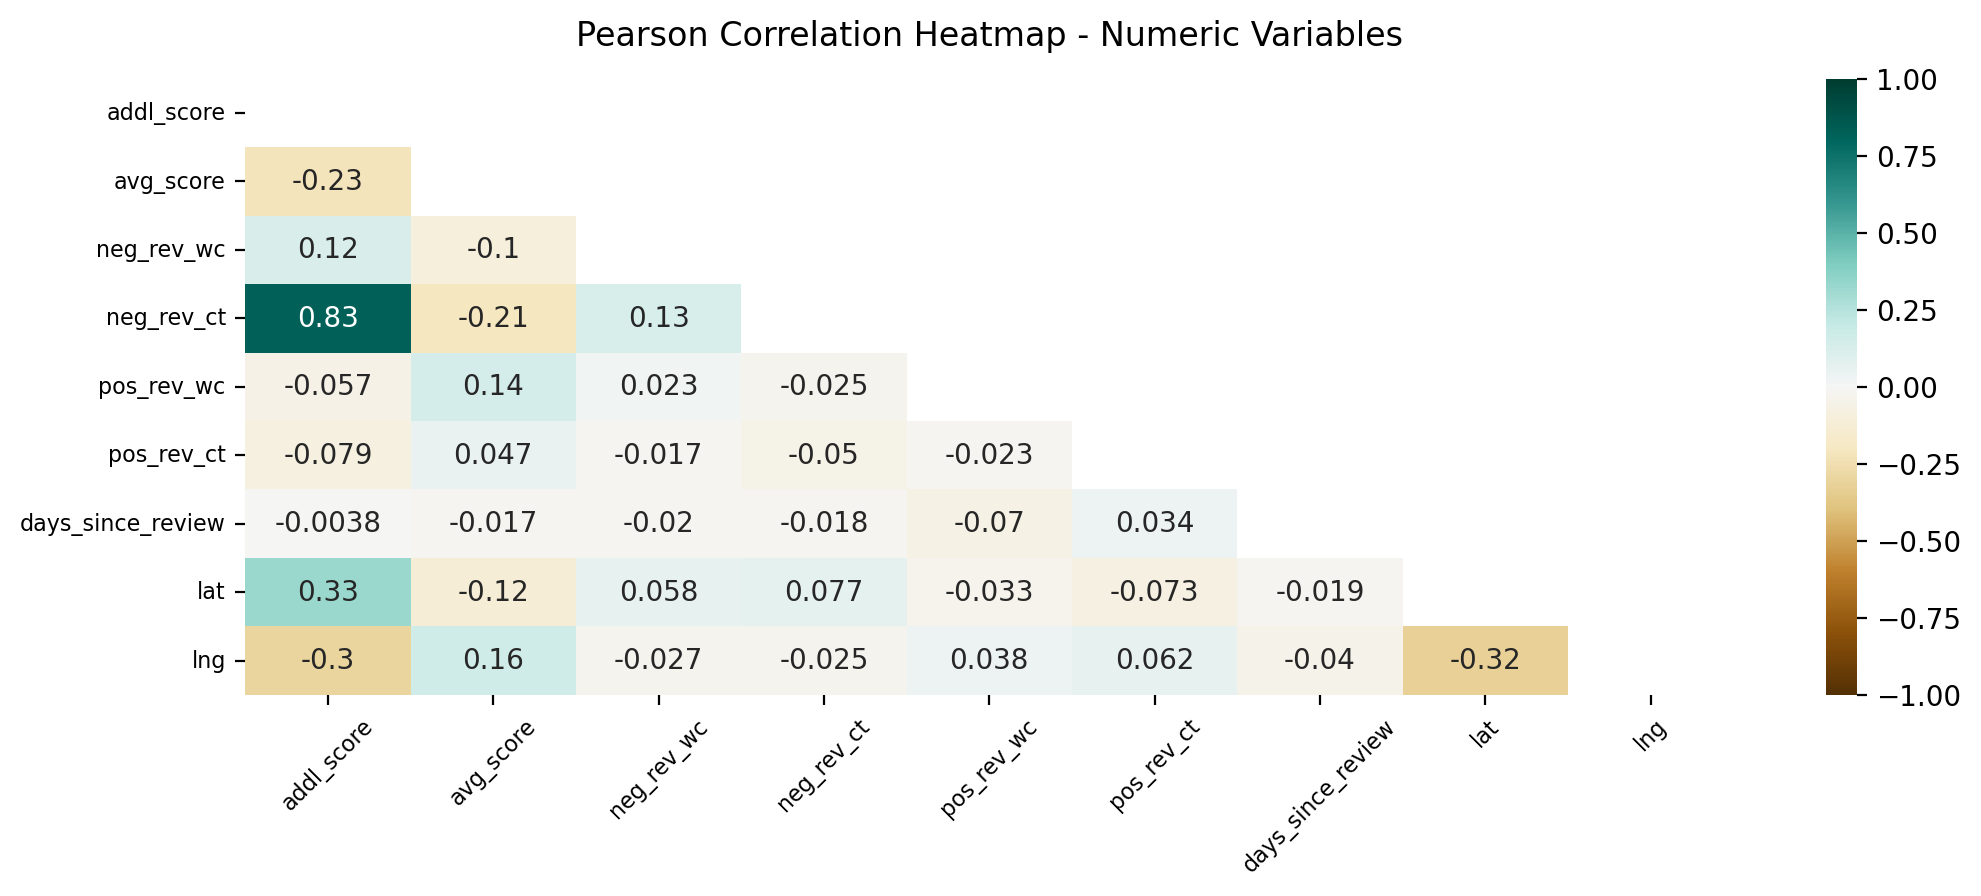

In [5]:
plot_coeff(df, num_cols, method = 'pearson')

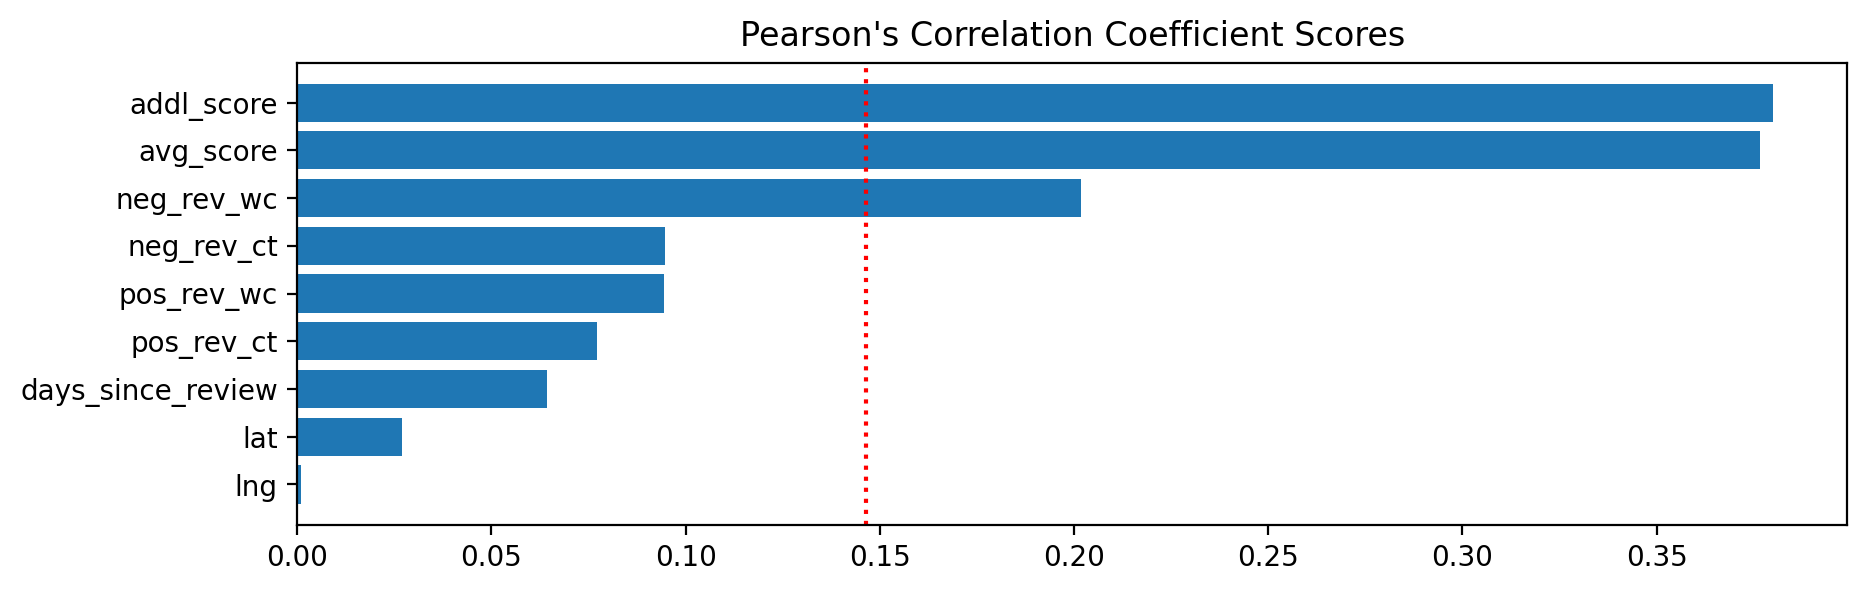

In [6]:
plot_pear(df, num_cols)

As clear from above plot, some of the features such as Positive Review word count, total positive reviews count, Negative Review word count, total Negative reviews count, days_since_review are not that important as per Spearman's Rank Coefficient

***
<a id='4'></a>

## Principle Component Analysis (PCA)

For understandng this, we generate a sample dataset from sklearn make_regression module

In [4]:
X, y = skdt.make_regression(n_samples=1000, n_features=100, n_informative=10, n_targets=1, bias=0.0, effective_rank=4, 
                            tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=0)

#### Feature importance depicted by Eigenvectors explained variance ratio

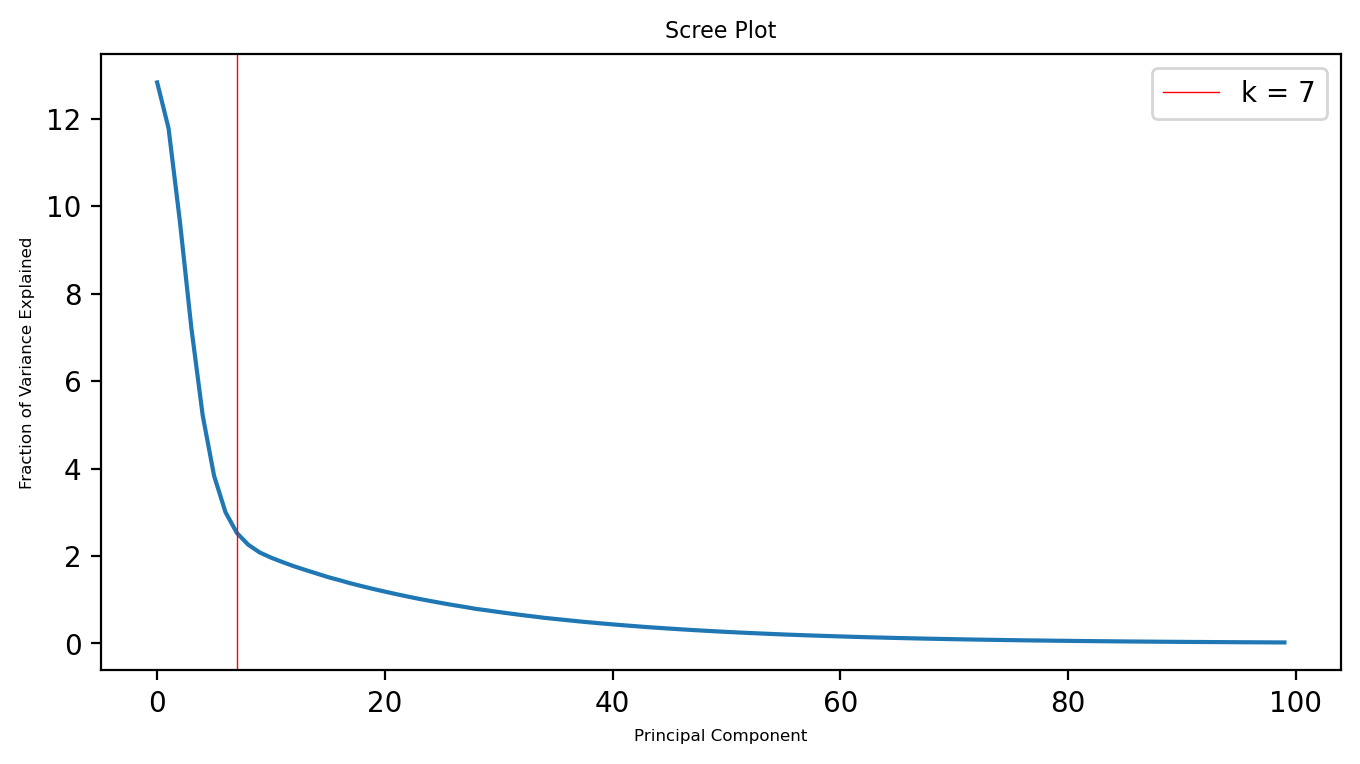

In [3]:
per_var = 100*PCA().fit(X).explained_variance_ratio_
plot_scree(per_var)

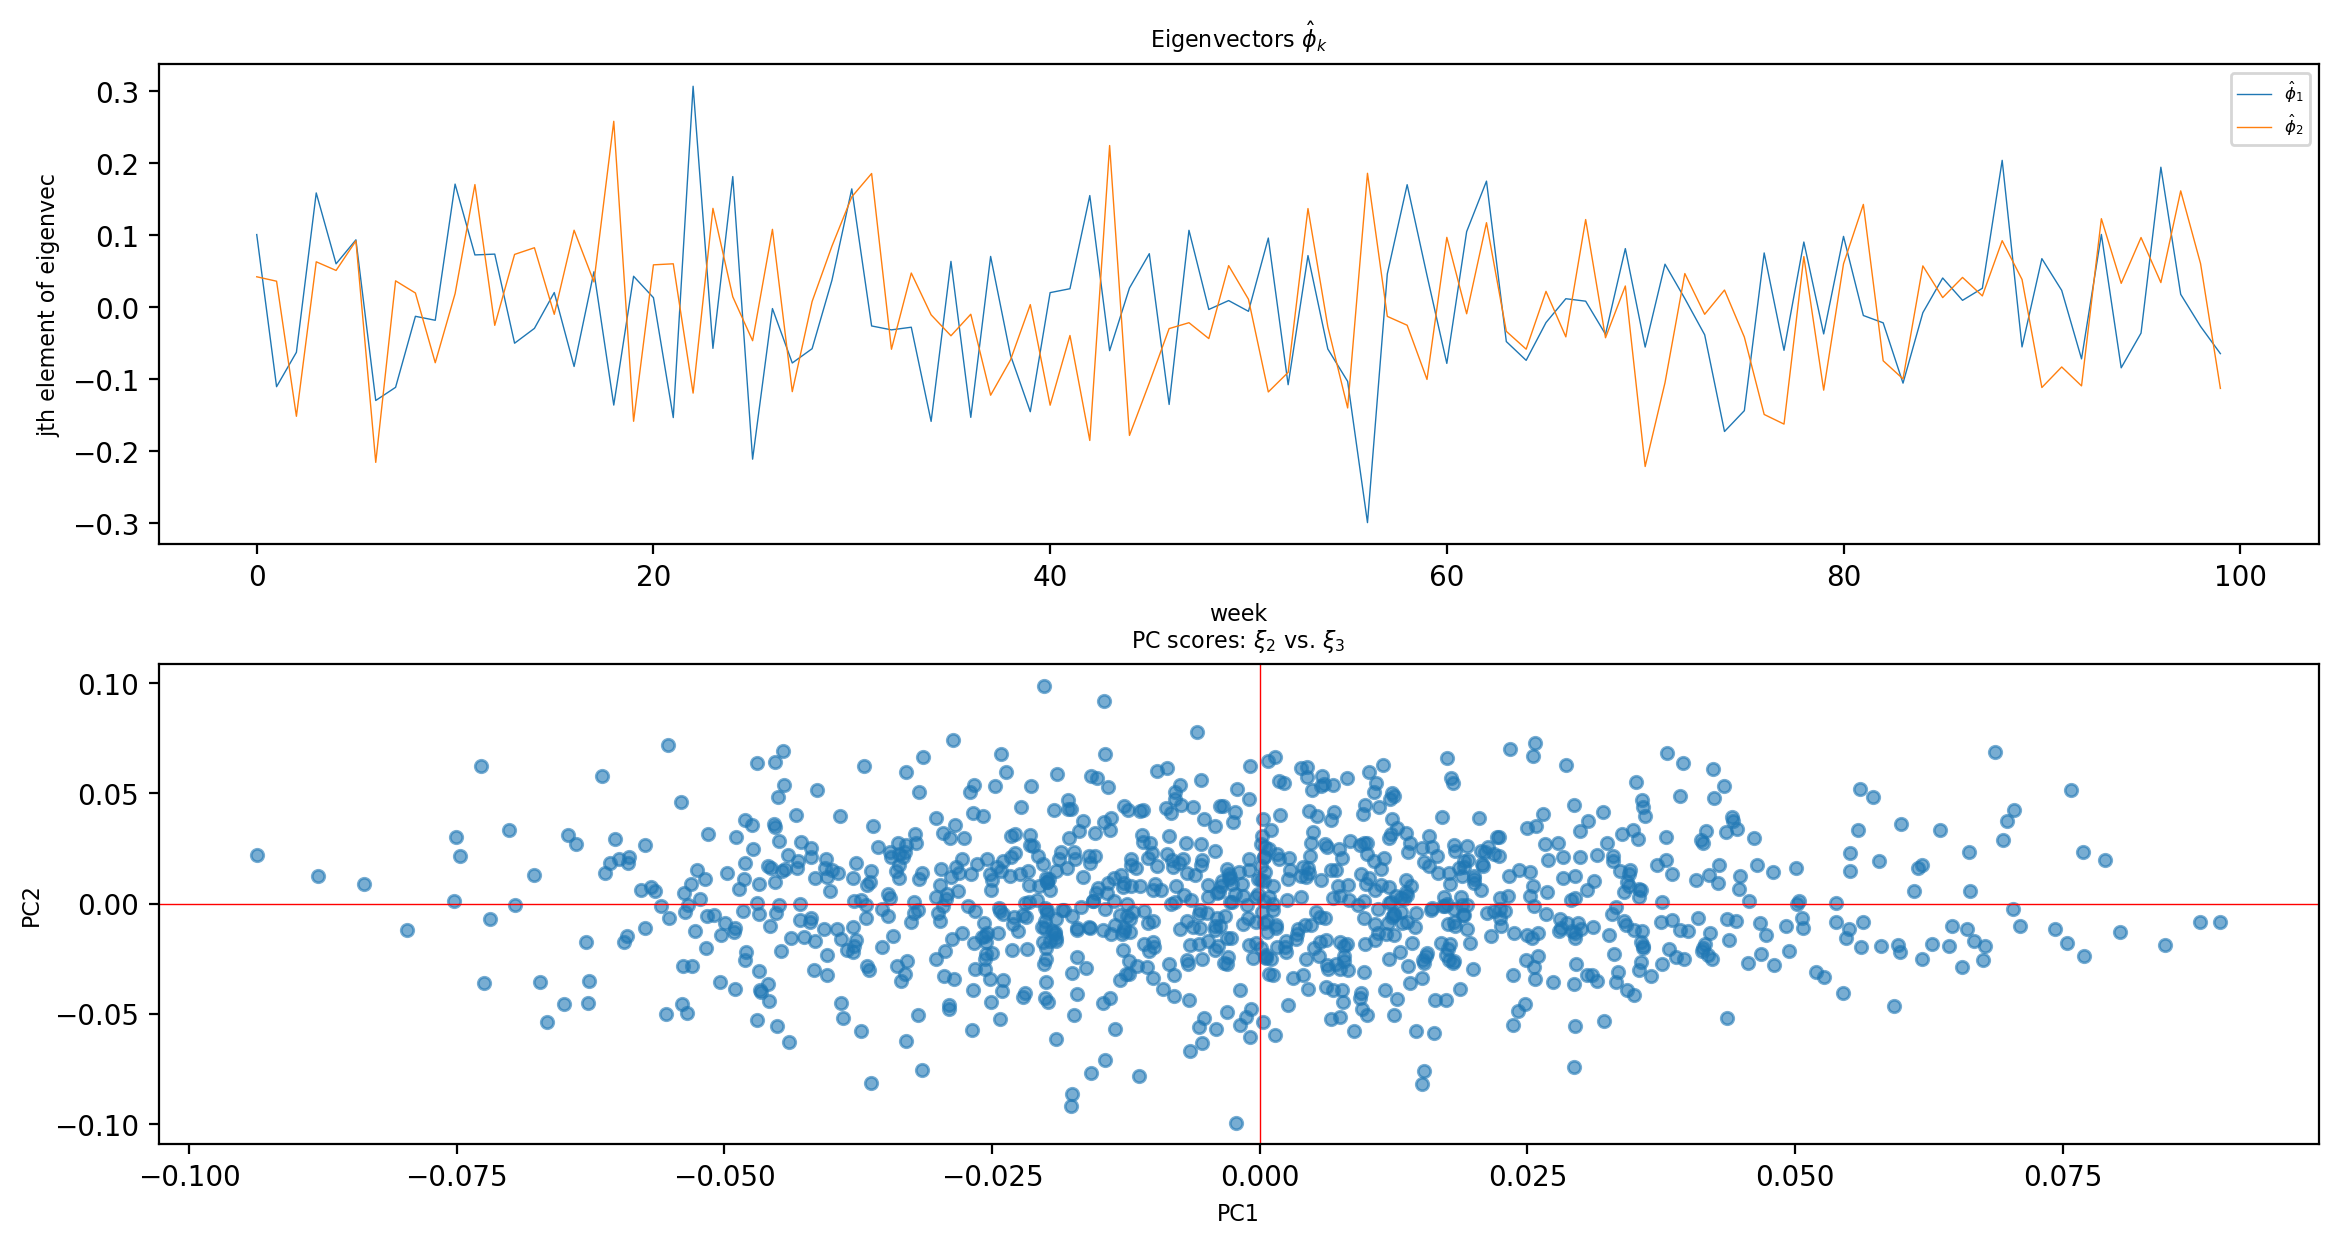

In [77]:
# 2 components
pca = PCA(n_components=7)
pca_data = X.copy()
eigenvecs_df, scores = pca_eig(pca, pca_data)
plot_eigen(eigenvecs_df, scores)

As seen above, maximum variance is observed in two features identified along the top two eigen vectors

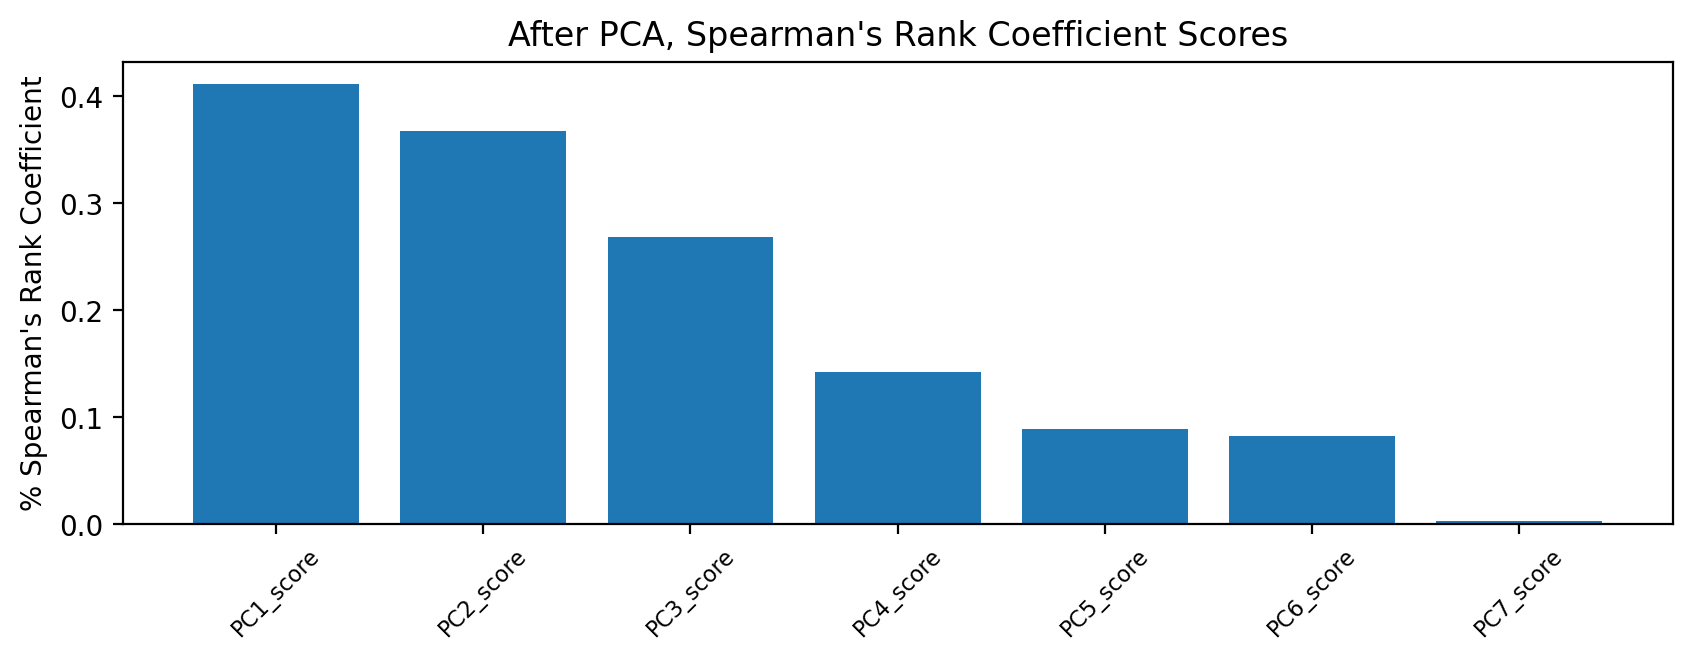

In [80]:
score_cols = list(scores.columns)
plot_spear(scores, score_cols, target = y, title = "After PCA, Spearman's Rank Score")

After performing the PCA, we find that 100 features have been reduced to only the top 7 features using PCA, as these are the only features that matter to the target variable 'y'

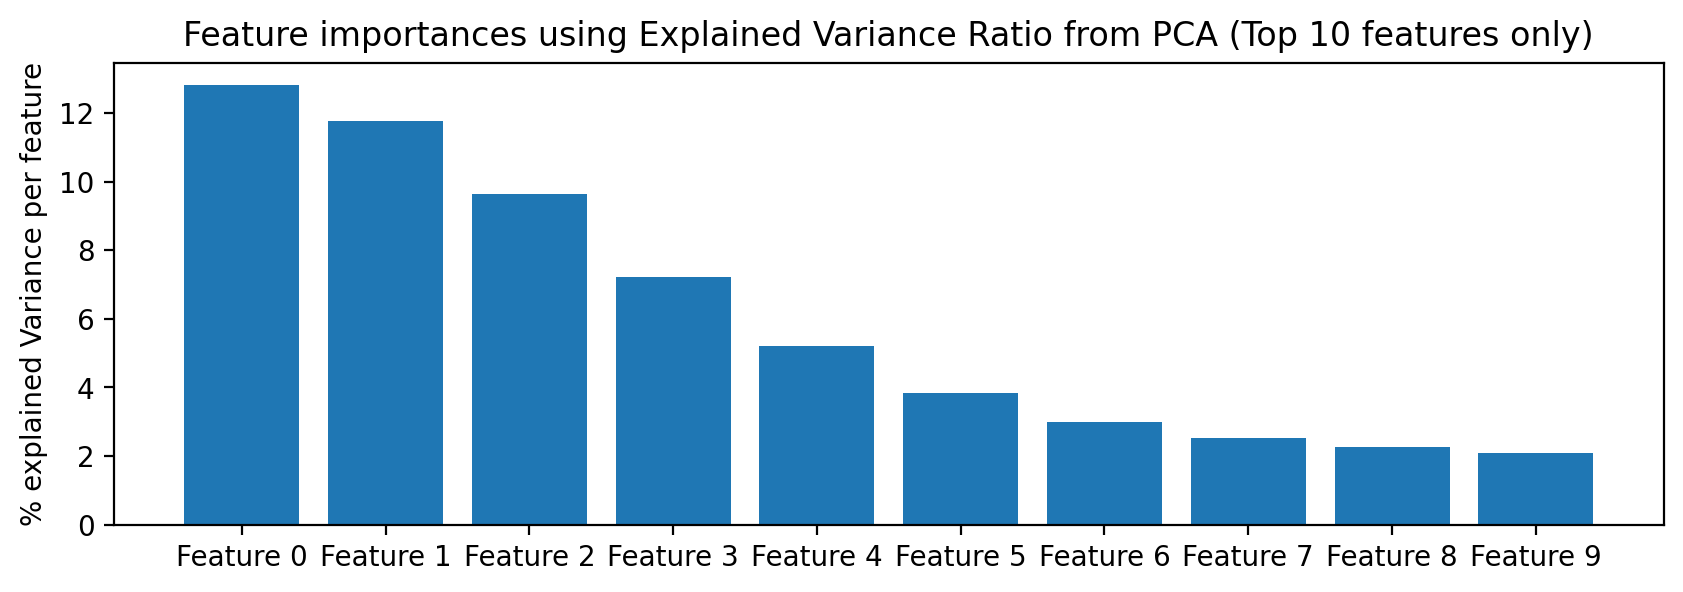

In [79]:
per_var = 100*PCA().fit(X).explained_variance_ratio_[:10]
feature_names = [f"Feature {i}" for i in range(X.shape[1])][:10]
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 3))
ax.bar(x = feature_names, height = per_var)
ax.set_title("Feature importances using Explained Variance Ratio from PCA (Top 10 features only)")
ax.set_ylabel("% explained Variance per feature")
plt.show()

***
<a id='5'></a>

## Mutual Information Score

- Ref: https://gist.github.com/GaelVaroquaux/ead9898bd3c973c40429
- Paper: https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.422.5607&rep=rep1&type=pdf

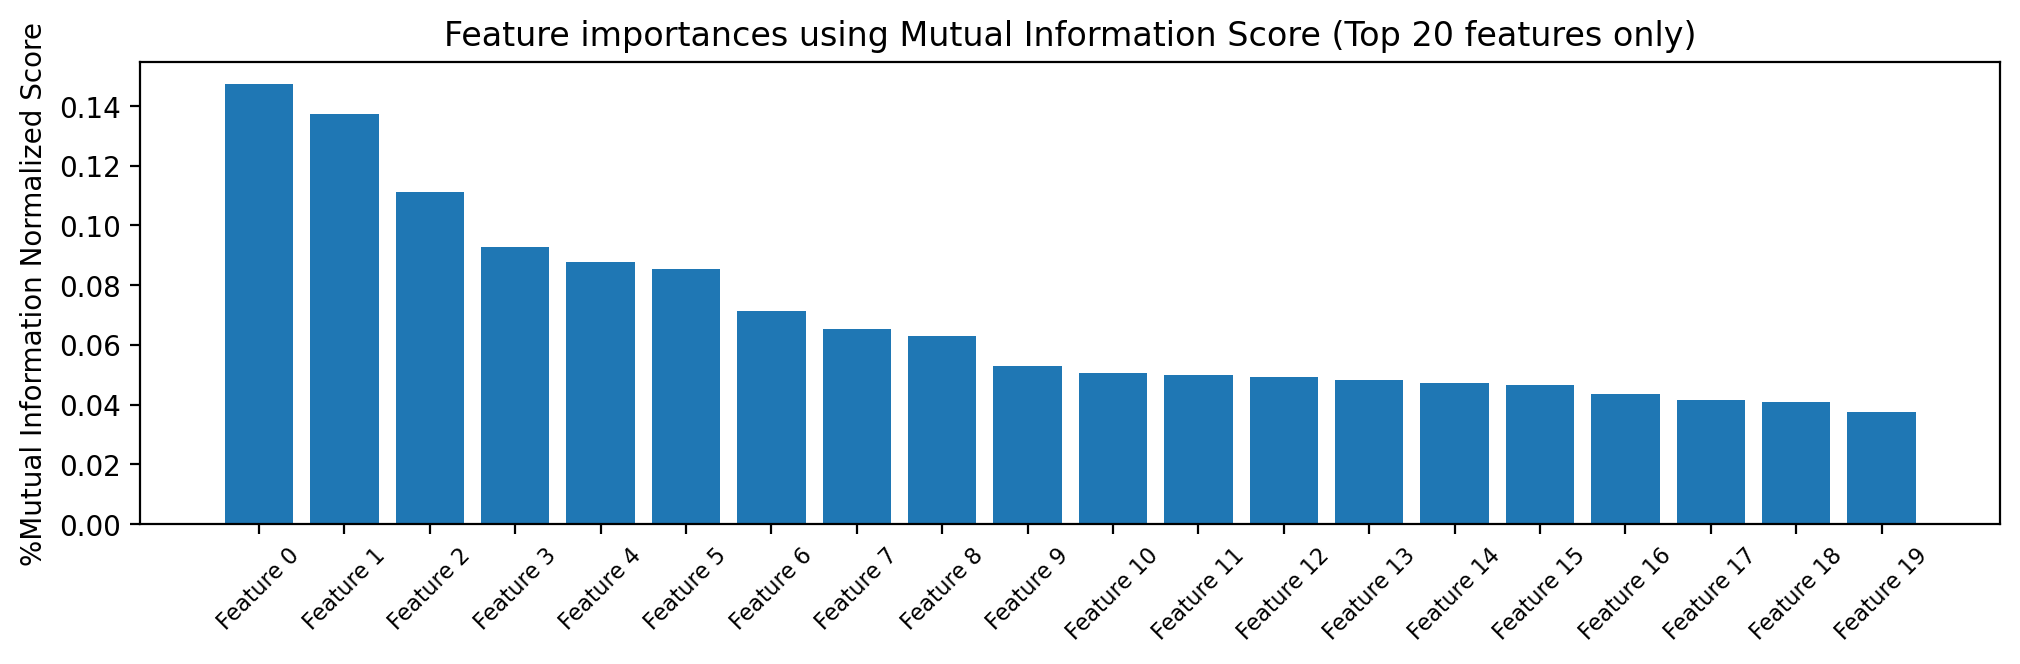

In [127]:
plot_mi_score(X, y)

Feature importance using Normalized Mutual Information Score

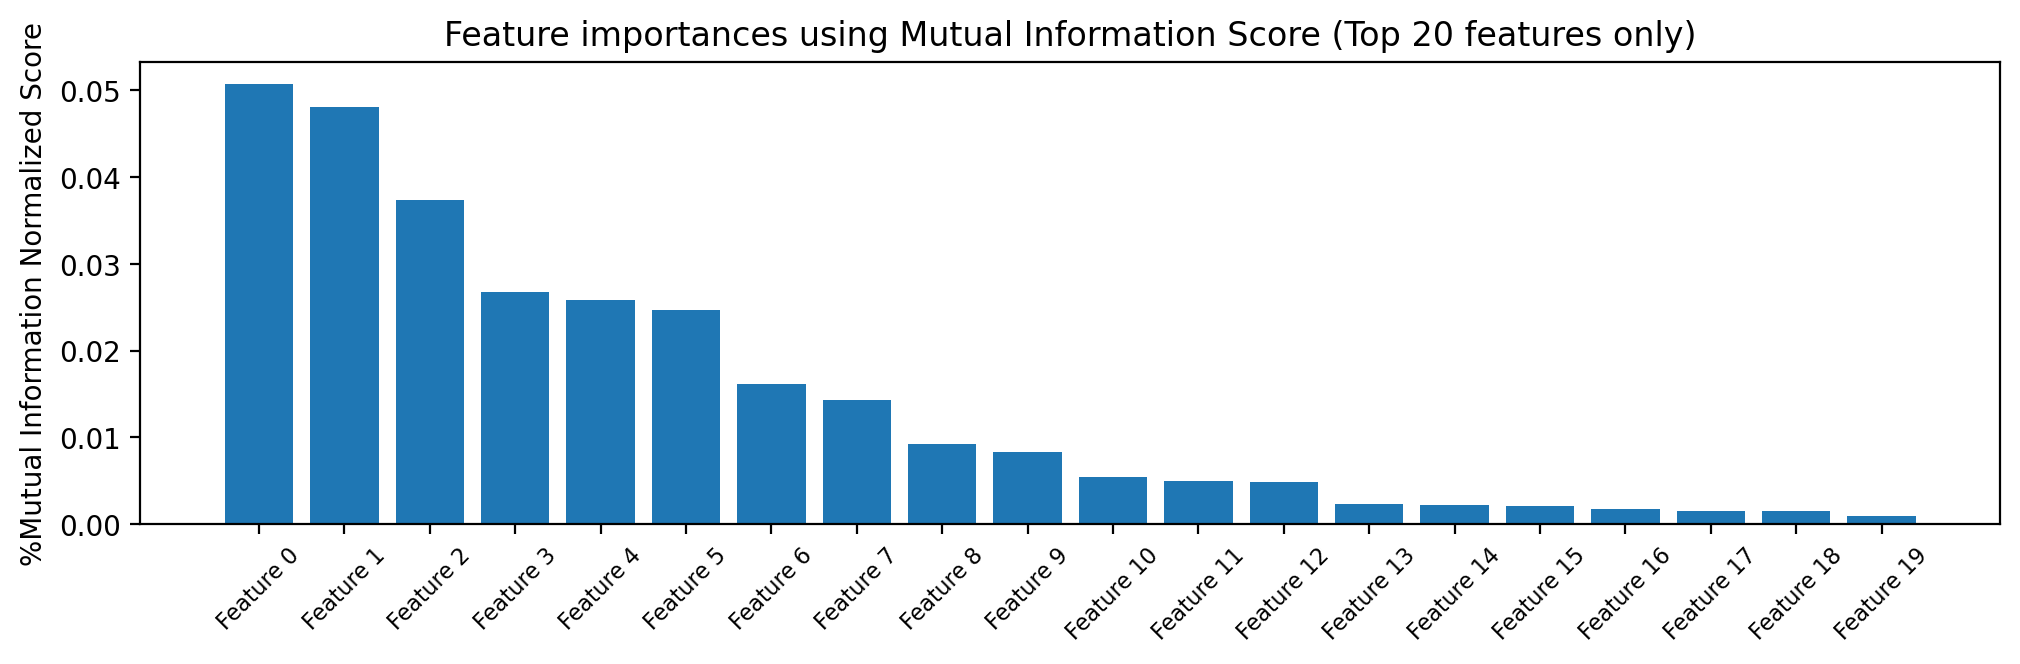

In [128]:
# Normalized MI
plot_mi_score(X, y, method = 'norm_mi')

# Classification

### Generating sample data

In [19]:
X, y = skdt.make_classification(n_samples=1000, n_features=30, n_informative=3, n_redundant=0, n_repeated=0, n_classes=2, 
                                weights = (.4, .6), random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

***
<a id='6a'></a>

### Ensemble Feature Importance
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

#### Based on mean decrease in impurity

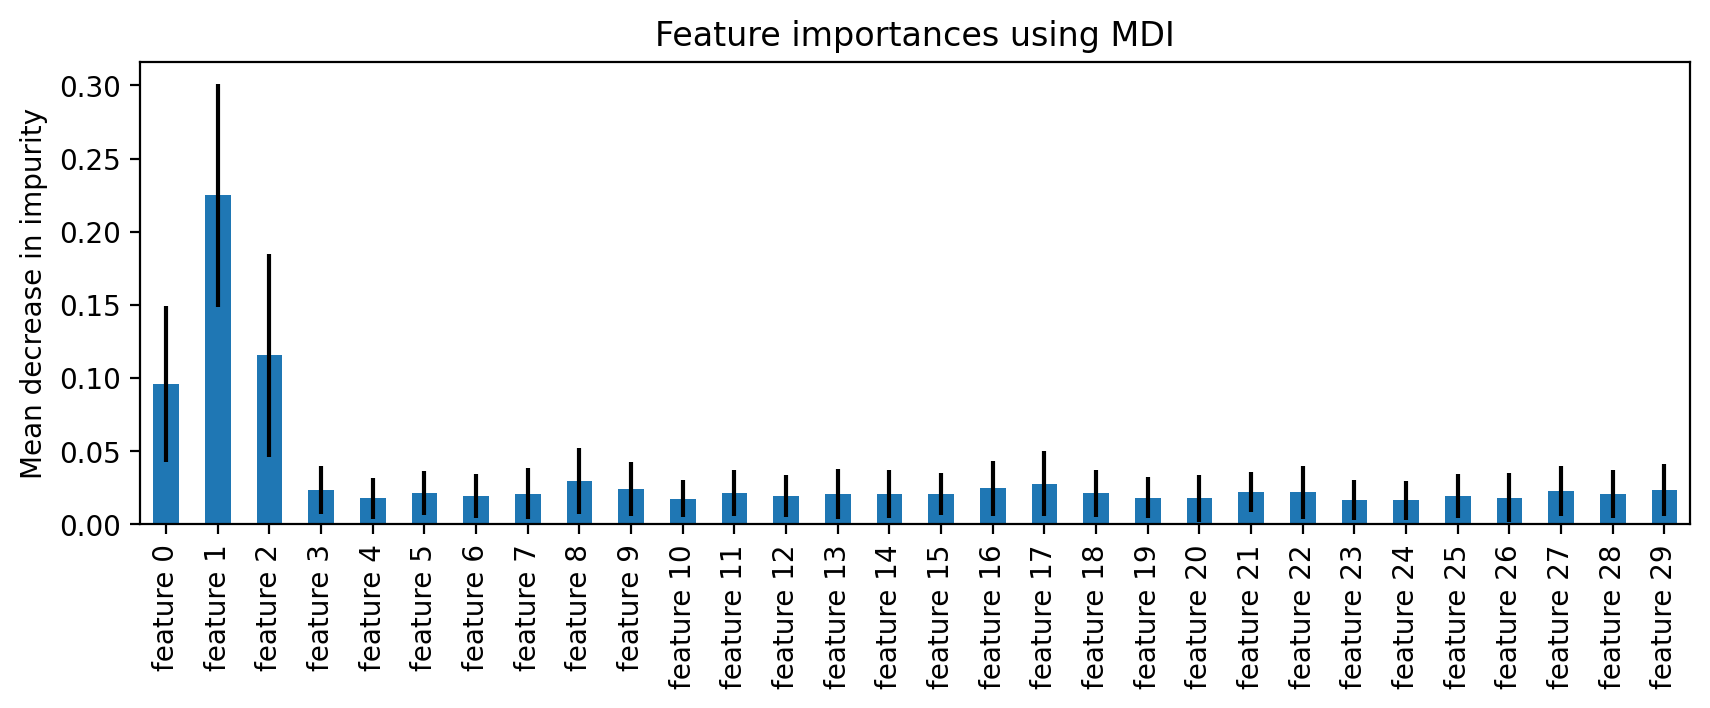

In [20]:
rf_imp = forest_imp(X_train, y_train, show = True)

***
<a id='6b'></a>

### Based on feature permutation

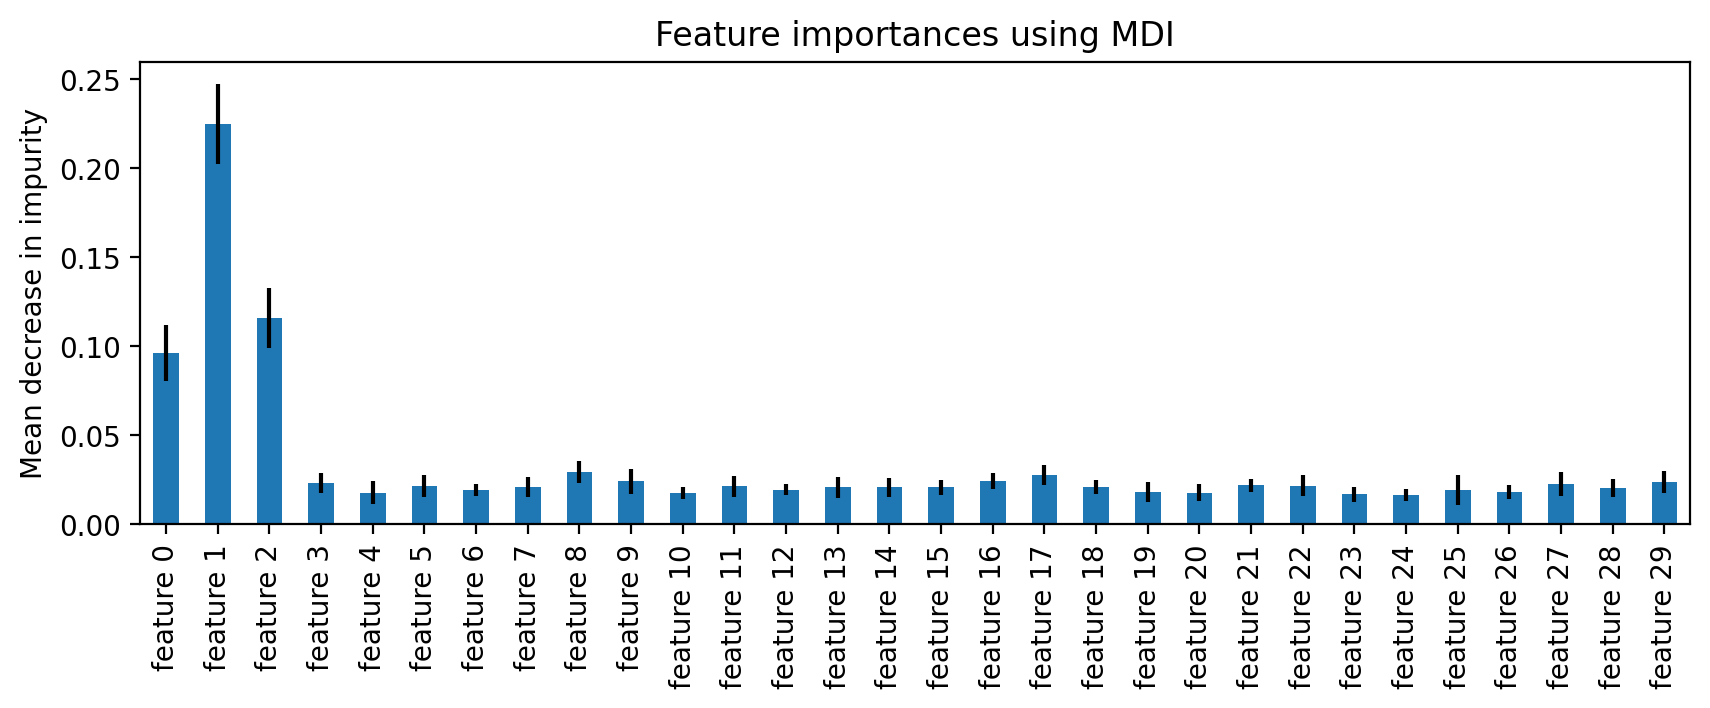

In [28]:
perm_imp = perm_imp(X_train, y_train, X_test, y_test, show = True)

#### Testing it on sample dataset from SDSS (Sloan Digital Sky Survey) sourced from Kaggle
Ref: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

In [65]:
df2 = pd.read_csv('data/star_classification.csv')
df2 = df2.sample(1000)

In [66]:
X = df2.loc[:, df2.columns != 'class']
y = df2['class']

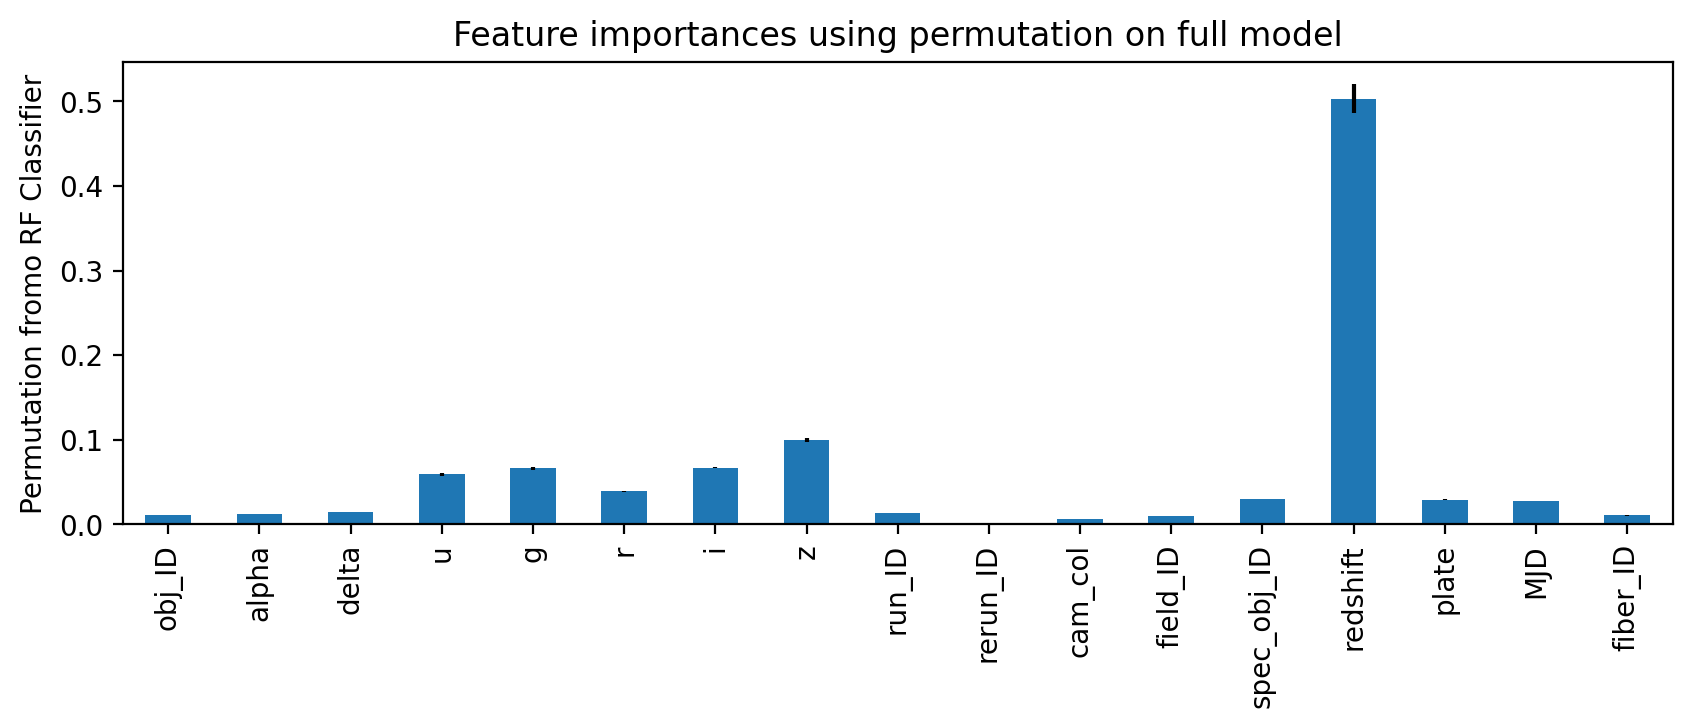

In [67]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

per_imp = permutation_importance(forest, X, y, n_repeats=10, random_state=42, n_jobs=2)

importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 3))
forest_importances.plot.bar(yerr=per_imp.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Permutation fromo RF Classifier")
plt.show()

As viewed in the above plot, the feature `redshift` seems to be the most important feature in predicting the class of stellar objects in the night sky. This is followed by 'u' and 'z' which are Infrared filter and green filter respectively in the photometric system

***
<a id='6c'></a>

### Using Decision Tree Classifier with `Gini Score`

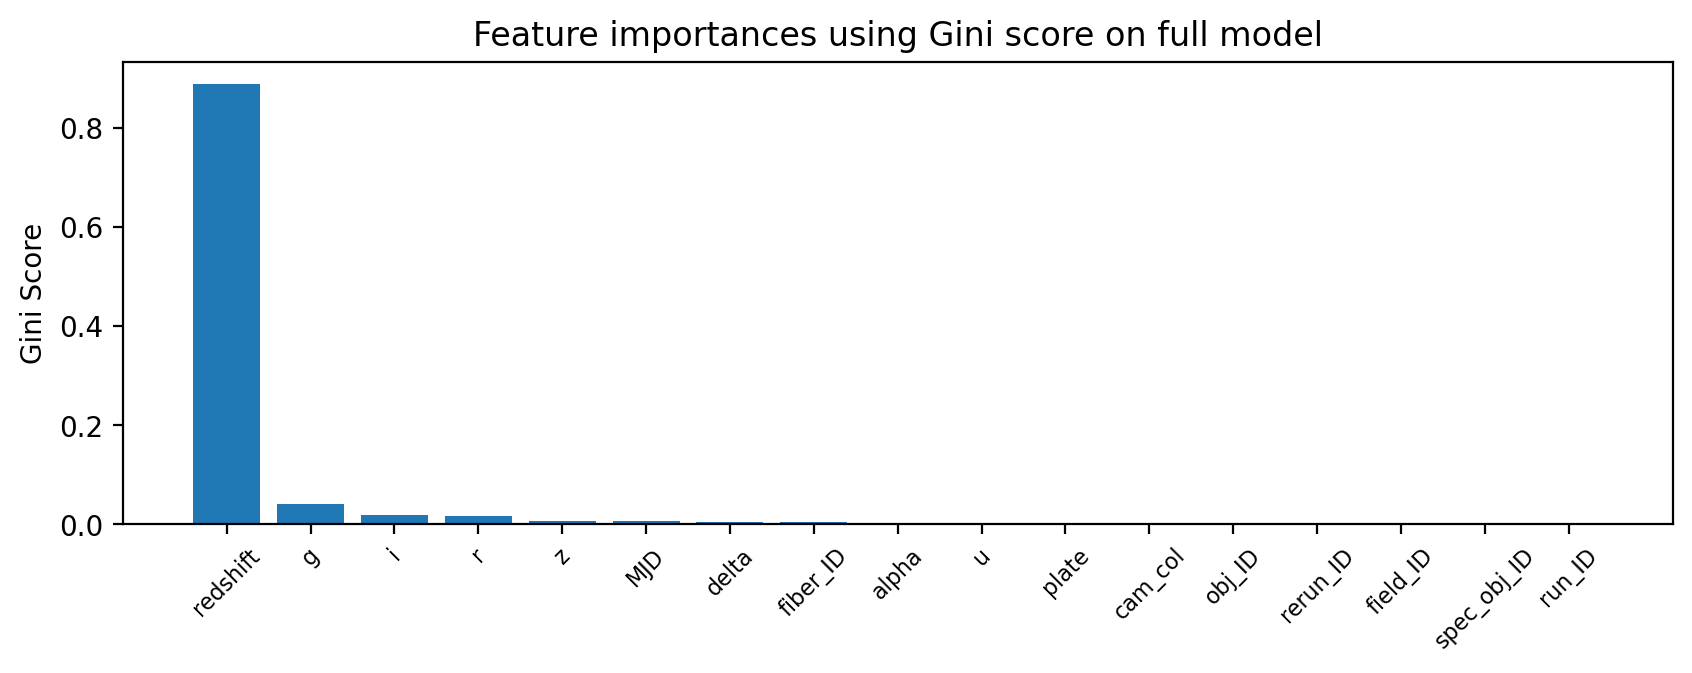

In [69]:
clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X, y)
feat_imp = clf.feature_importances_

s_ind = feat_imp.argsort()[::-1]
s_feats = X.columns[s_ind]
s_imp = feat_imp[s_ind]

# Create a bar plot of the feature importances
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 3))
ax.bar(s_feats, s_imp)
ax.set_title("Feature importances using Gini score on full model")
ax.set_ylabel("Gini Score")
plt.xticks(rotation=45, fontsize = 8)
plt.show()

***
<a id='7'></a>

## Feature Selection using SHAP

The core idea behind Shapley value based explanations of machine learning models is to use fair allocation results from cooperative game theory to allocate credit for a model’s output among its input features . In order to connect game theory with machine learning models it is nessecary to both match a model’s input features with players in a game, and also match the model function with the rules of the game. Since in game theory a player can join or not join a game, we need a way for a feature to “join” or “not join” a model. The most common way to define what it means for a feature to “join” a model is to say that feature has “joined a model” when we know the value of that feature, and it has not joined a model when we don’t know the value of that feature. To evaluate an existing model when only a subset of features are part of the model we integrate out the other features using a conditional expected value formulation. This formulation can take two forms.
In the first form we know the values of the features in S because we observe them. In the second form we know the values of the features in S because we set them. In general, the second form is usually preferable, both becuase it tells us how the model would behave if we were to intervene and change its inputs, and also because it is much easier to compute. In this tutorial we will focus entirely on the the second formulation. We will also use the more specific term SHAP values to refer to Shapley values applied to a conditional expectation function of a machine learning model.

SHAP values can be very complicated to compute (they are NP-hard in general), but linear models are so simple that we can read the SHAP values right off a partial dependence plot. When we are explaining a prediction, the SHAP value for a specific feature is just the difference between the expected model output and the partial dependence plot at the feature’s value.

### Implementation for Regression - on SKLearn Random Dataset

In [70]:
X, y = skdt.make_regression(n_samples=1000, n_features=100, n_informative=10, n_targets=1, bias=0.0, effective_rank=4, 
                            tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=5)
# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=5)
shap.initjs()

In [71]:
xgb_model = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.001, random_state=0)
xgb_model.fit(X_train, y_train)

#Getting Predictions
y_predict = xgb_model.predict(X_test)

feature_names = [f"feature {i}" for i in range(X.shape[1])]
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)
i = 456
shap.force_plot(explainer.expected_value, shap_values[i], features=X_train[456], feature_names=feature_names)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


### In blue, we have negative Shap values that show everything that pushes the target value in the negative direction. While the Shap value in red represents everything that pushes it towards a positive direction. Note that this is only for observation number 456

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


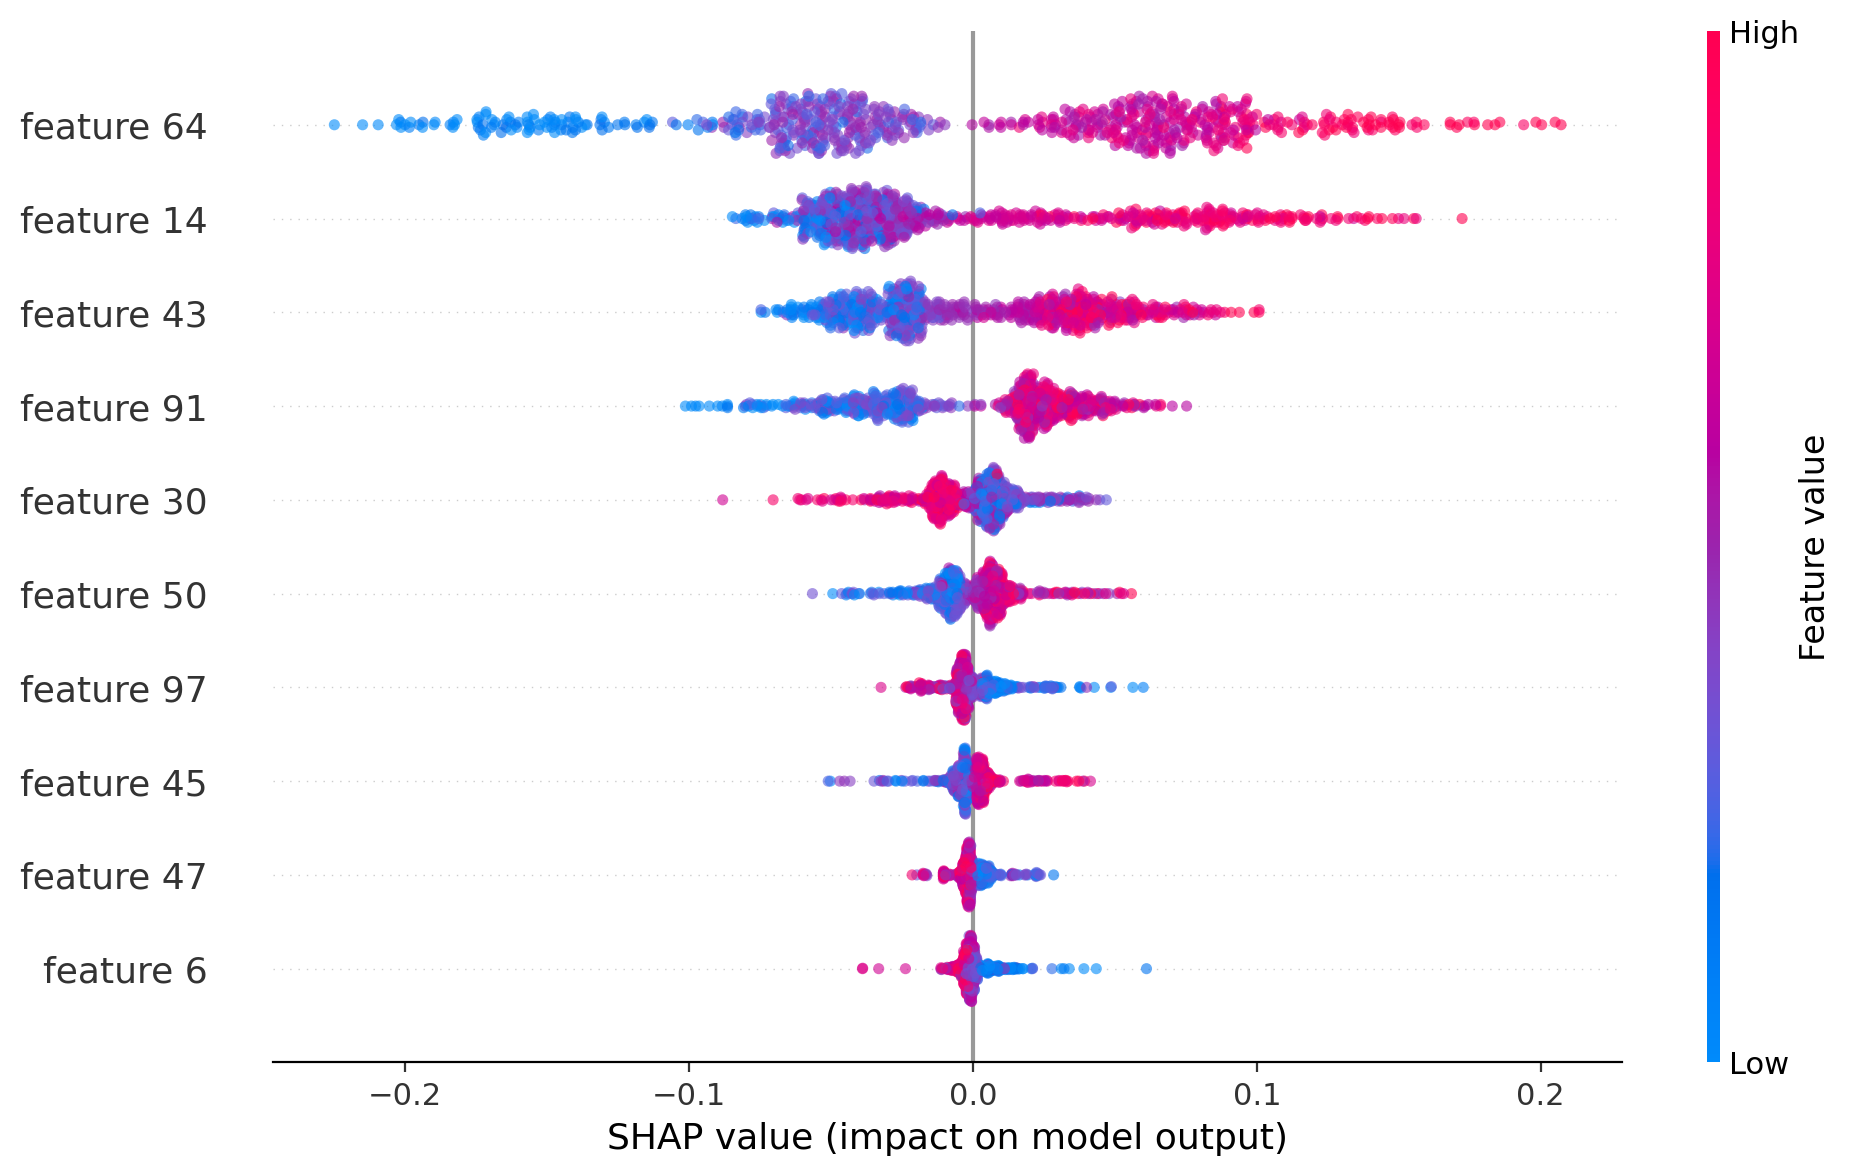

In [72]:
shap.summary_plot(shap_values, features=X_train, feature_names=feature_names, 
                  max_display = 10, alpha = 0.6, plot_size = (10, 6))

### Implementation for Classification - on the Stars Dataset

In [87]:
df2 = pd.read_csv('data/star_classification.csv')
df2 = df2.sample(10000)
X = df2.loc[:, df2.columns != 'class']
y = df2['class']
y.replace(['GALAXY', 'QSO', 'STAR'], [0, 1, 2], inplace=True)
# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=5)
shap.initjs()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


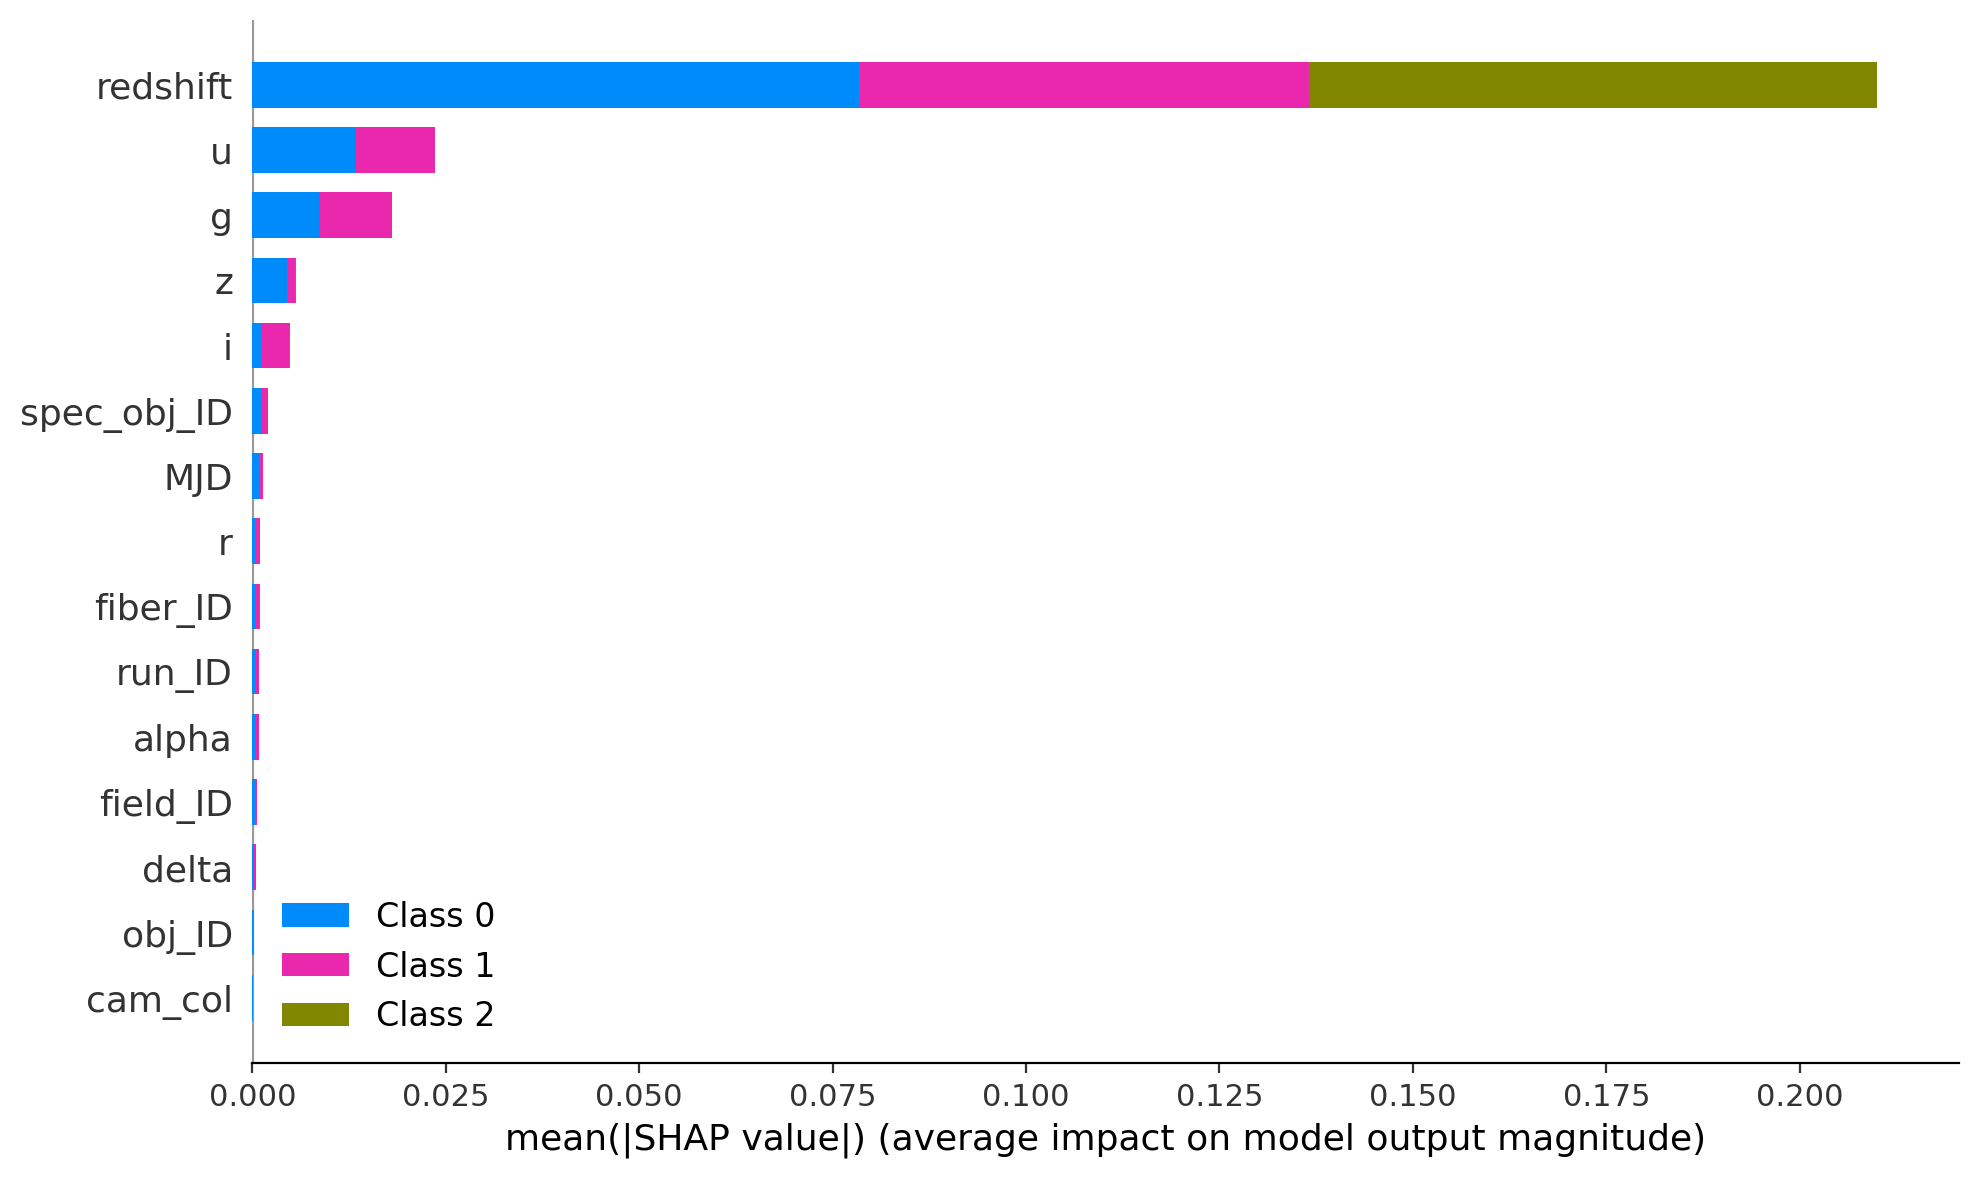

In [74]:
xgb_model = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.001, random_state=0)
xgb_model.fit(X_train, y_train)

#Getting Predictions
y_predict = xgb_model.predict(X_test)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, 
                  max_display = 15, alpha = 0.6, plot_size = (10, 6))

SHAP Advantages
- The difference between the predicted and the average predicted value is equally distributed across the features of the instance - this is known as the shapley efficiency property
- The Shapley value allows for explanations that are contrasting in nature: Instead of comparing a prediction with the average prediction of the whole dataset, you could compare it to a subset or even to a single datapoint
- The Shapley value is one of the only explanation methods with a logical theory behind it

SHAP Disadvantages
- The Shapley value is highly compute intensive 
- It is unclear how to choose a sensitive M for Shapely value
- The Shapley value can be misinterpreted - The Shapley value is the wrong explanation method if you seek sparse explanations (explanations that involve only a few features)
- Explanations created with the Shapley value method always use all the features

***
<a id='8'></a>

### Feature Selection

An input array is constant; the correlation coefficient is not defined.
An input array is constant; the correlation coefficient is not defined.


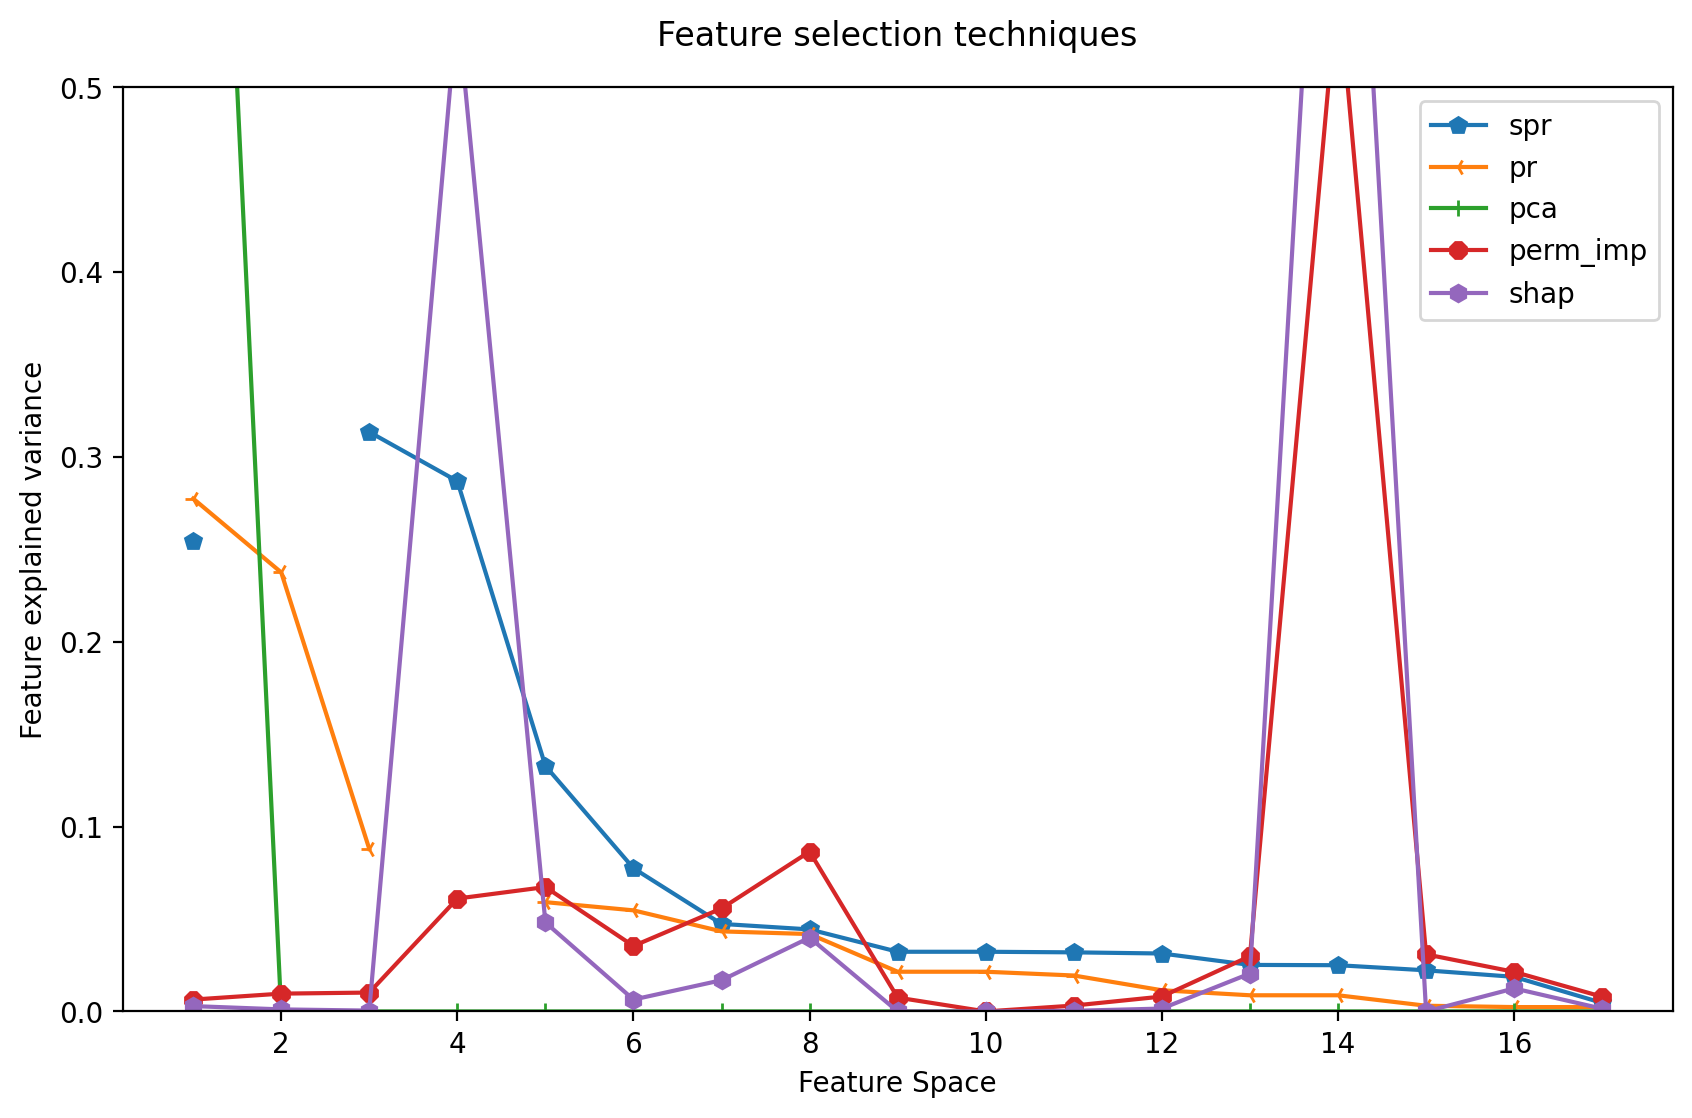

In [88]:
spr = spearman_coeff(X, X.columns, y)
pr = pearson_coeff(X, X.columns, y)
pca_var = PCA().fit(X).explained_variance_ratio_
perm_imp = forest_imp(X, y, show = False)
shap_val = np.abs(np.mean(np.mean(shap_values, axis = 1), axis = 0))
sh = sh / np.linalg.norm(sh)
fi = [spr, pr, pca_var, perm_imp, sh]
fi_names = ['spr', 'pr', 'pca', 'perm_imp', 'shap']
fig, ax = plt.subplots(figsize=(10,6))
m=['p','3','+','8', 'h', 'd', '^', '<', 'v']
for i in range(len(fi)):
    ax.plot(range(1,len(fi[i])+1), fi[i], marker = m[i], label = fi_names[i])
    ax.set_xlabel("Feature Space")
    ax.set_ylabel('Feature explained variance')
    ax.set_title("Feature selection techniques", pad=15)
    ax.set_ylim(0, 0.5)
plt.legend()
plt.show()

As clear from above, some of the techniques are better able to predict feature importance depending on the type of data at hand

***
<a id='9'></a>

### Summary
- Various Methods were used for estimating feature importance
- There are a few methods that result in a better feature selection than others
- Feature importance is available for more than just linear models
- It is recommended to use permutation importance for all models, including linear models, because we can largely avoid any issues with model parameter interpretation

***
<a id='10'></a>

### Reference

#### Initializing code

In [1]:
from featimp_ds import *
%config InlineBackend.figure_format = 'retina'

/Users/deepaksingh/opt/anaconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### References used from the internet
- https://github.com/parrt/msds689/blob/master/projects/featimp/featimp.md
- https://explained.ai/rf-importance/index.html
- https://www.firmai.org/bit/shapley.html
- https://shap.readthedocs.io/en/latest/
- https://towardsdatascience.com/a-novel-approach-to-feature-importance-shapley-additive-explanations-d18af30fc21b
- https://medium.com
- https://stackoverflow.com
- https://wikipedia.com


#### Following key packages were used in creating this report
- pandas
- numpy
- math
- scipy
- matplotlib
- sklearn
- scipy
- datetime

***